## 2. 기본 개념들과 베이지안 확률론적 관점

본 장에서는, 조건부 확률에 대한 개본적인 개념을 소개하고, 베이즈 이론에 대해 설명할 것입니다. 이산 사건들과 연속 변수 예측에 대한 다양한 예제를 다룰 것입니다. 그리고 베이지안 모델 업데이트에 대해 설명할 것입니다. 모델 식별 가능성에 대한 문제도 다룰 것입니다. 결정론적 방법과 확률론적 방법을 비교할 것입니다. 확률론적 방법의 장점들, 어려운 점들, 개선이 필요한 사항들에 대해 이야기 할 것입니다. 선형 및 비선형 회기 문제에 대해 다룰 것입니다. 업데이트 한 확률밀도함수는 매우 복잡할 수 있기 때문에, 그 확률밀도함수를 표현할 수 있는 샘플을 생성하기 위한 적응 MCMC 시뮬레이션 방법을 소개할 것입니다. 마지막으로 베이즈 추론의 기본 개념을 설명하기 위한 3가지 적용 사례를 소개할 것입니다. 첫째로,  베이지안 방법을 사용해 건물의 고유진동수와 대기 온도 사이의 관계를 찾아낼 것입니다. 길이와 탄성계수에 대한 온도의 영향을 관찰해 보면, 건물을 빔으로 모델링 가능한 경우, 온도와 고유진동수 사이의 관계는 2차함수 형태가 됩니다. 22층 건물에서 6개월간 측정한 데이터를 사용하여 베이지안 방법으로 관련 계수들 및 불확실성에 대해 추정할 것입니다. 두 번째 적용 사례는 잘 알려진 칼만필터 입니다. 칼만필터 또한 베이지안 업데이트 방법으로 볼수 있으며, 상태 추정 및 변수 식별에 유용합니다. 하지만 일반적으로 사용자는 사전 정보 또는 경험을 바탕으로 잡음 변수를 결정해야합니다. 본 예제에서는 베이지안 접근법을 사용하여 이 변수들을 추정할 것입니다. 마지막 적용 사례는 $PM_{10}$ 농축에 대한 대기 공기 질 예측에 관한 것 입니다. 실시간 예측 시스템을 개발하고, 칼만필터를 사용해 시스템을 업데이트할 것입니다.  변수 모델을 적절히 선택하면, 이 예측 시스템은 잘 알려진 인공 신경망보다 더 좋은 성능을 보이게 됩니다. 특히 높은 $PM_{10}$ 농축 데이터를 예측하는 경우 성능이 더 좋게 됩니다.

## 2.1 조건부 확률 및 기본 개념

두 개의 사건 A, B가 있습니다. **조건부 확률**은 사건 B가 일어난 후 사건 A가 발생할 확률이며 다음과 같습니다.

$$P(A|B)=\frac{P(A \cap B)}{P(B)} \tag{2.1}$$

상기 식은 $P(B)>0$일 때만 성립하며, 만약 $P(B)=0$이면 $P(A \cap B)=0$이 되고, $P(A|B)$는 의미가 없게 됩니다. $\cap$ 기호는 논리 연산자 and를 의미하며, $P(A \cap B)$는 두개의 사건이 모두 발생할 확률을 의미합니다.

조건부 확률은 "원인-결과"와 "시간 순서"의 관계를 의미하지는 않습니다. 예를 들어 항암치료 중인 사람이 암일 확률이 1.0에 가까울 것임은 당연합니다. 하지만 조건부 확률이 높다고 해서 약물치료가 암의 원인은 아닙니다. 이는 단순히 암 검사 결과 양성 반응인 사람들이 항암치료 하게 되기 때문입니다.

조건부 확률 $P(A|B)$가 크면, 세 가지 가능성을 을 생각해볼 수 있습니다. (1) 사건 A는 사건 B의 결과 또는 그 반대일 가능성입니다. 항암치료를 예로 들면, 암 (A)는 원인이지만 항암치료 (B)의 결과는 아닙니다. (2)  두 사건 A, B를 일으키는 더 높은 수준의 사건 C가 있을 가능성 입니다. 예를들어, 마카오에서 공기가 좋은 날이면, 교통 체증이 심할 확률이 높습니다. 마카오의 공기와 교통체증 사이에 인과 관계가 없는 것은 명백합니다.  마카오에서 자동차 매연은 대기 오염의 주된 원인이 아니지만 거리 단위에서의 대기 질에는 큰 영향을 줍니다. 대기 질이 좋고 교통 체증이 심한 날은 비가 많이 온 날의 결과가 됩니다. 왜냐하면 비가 오염된 공기를 씻어줌과 동시에 교통체증을 일으키기 때문입니다. (3) 사건 A,B에 대한 인과관계에 포함되는 중간 또는 상위 사건이 한개 있을 가능성 입니다. 이는 (1), (2) 경우를 조합 및 확장한 것입니다.

**전체 확률의 법칙**은 조건부 확률을 다룰때 매우 유용합니다. 사건 A가 N 개의 **상호 독립적인 사건** $A_1, A_2,\dots,A_N$로 나누어 질 수 있으면, 다른 사건 B의 확률은 다음과 같습니다.

$$ P(B)=\sum_{n=1}^{N} P(B \cap A_n) = \sum_{n=1}^{N} P(B|A_n)P(A_n) \tag{2.2} $$

상호 독립적인 사건인 경우 다음을 만족합니다.

(1) $P(A_{n} \cap A_{n'})=0,\;\;\;\; n \neq n'$

(2) $A$는 모든 $A_n$의 합집합

전체확률 법칙의 연속적인 형태 또한 자주 사용됩니다. 이 경우 사건 B의 확률은 다음과 같이 표현됩니다.

$$ P(B)=E[P(B|X)] = \int_{-\infty}^{\infty} P(B|X)p(X)dX \tag{2.3} $$

$E[.]$ : 수학적 예상치 (평균)

$p(X)$ : (실수) 무작위 변수 X에 대한 확률밀도함수 (PDF)

이는 실수축이 무한히 많은 간격으로 나누어 질 수 있기 때문에 가능한 것입니다. 서로 다른 간격 내의 무작위 변수 X에 대한 사건들은 상호 독립적이 됩니다.

더 나아가 이는 (실수) 무작위 변수에 적용 가능합니다.

$$ P(Y) = E[p(Y|X)] = \int_{-\infty}^{\infty} p(Y|X)p(X)dX \tag{2.4} $$

$p(Y|X)p(X)=p(X,Y)$ : X와 Y의 결합확률밀도함수(joint PDF)

따라서 $p(Y)$는 단순히 Y의 marginal PDF가 됩니다.

### 2.1.1 이산 사건에 대한 베이즈 이론

식 (2.1)에서 사건 A와 B의 위치를 바꾸고, $P(A \cap B)=P(B \cap A)$라는 사실을 사용하면 다음과 같은 베이즈 이론을 얻을 수 있습니다.

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)} \tag{2.5}$$

만약 사건 A를 N개의 상호 독립적인 사건 $A_1, A_2, \dots, A_N$으로 나눌 수 있으면, 상기 식의 분모인 확률 $P(B)$는 식 (2.2)를 사용해 다음과 같이 대체할 수 있습니다.

$$ P(A_n|B)=\frac{P(B|A_n)P(A_n)}{\sum_{n=1}^{N} P(A_n)P(B|A_n)},\;\;\;\; n=1,2,\dots,N \tag{2.6}$$


**예제** 의료 검진 테스트

희귀 바이러스와 그 바이러스에 대한 의료 검진 테스트 데이터를 고려해 봅시다. 이 바이러스를 옮기는 사람을 C로, 옮기지 않는 사람을 N으로 표기 합시다. 그리고 양성이 나온 사람을 '+'로, 음성이 나온 사람을 '-' 표기 합시다. 바이러스를 옮기는 사람의 수는 전체 도시 인구의 0.5 %임을 알고 있습니다. 즉, $P(C)=0.005$입니다. 이 의료 검진 테스트는 바이러스를 옮기지 않는 사람이 잘못된 양성 반응이 나타날 확률이 0.3%인 것으로 연구되었습니다. 즉, $P('+'|N)=0.003$입니다. 그리고 테스트 결과의 0.6%는 양성인것으로 확인되었습니다. 즉, $P('+')=0.006$입니다.

양성 반응이 잘못나올 확률은 시험결과가 양성으로 나타난 모든 경우 중에서 바이러스를 옮기지 않는 사람이 있을 확률로 정의 됩니다. 베이즈 정리를 사용하면, 양성 반응이 잘못나올  확률은 다음과 같이 추정됩니다.

$$P(N|'+')=\frac{P('+'|N)P(N)}{P('+')}$$

$$=\frac{P('+'|N)[1-P(C)]}{P('+')}$$

$$=\frac{0.003(1-0.005)}{0.006}$$

$$=0.4975$$ 

다시 말해, 모든 양성 반응 결과 중에서 잘못된 감지 결과의 확률을 의미합니다. 조건부 확률 $('+'|N)$이 작다는 측면에서 검진 테스트는 정확한 것 처럼 보이지만, 양성 검사가 잘못된 비율은 50%에 가깝고, 이는 Type 1 오류에 대한 잘 알려진 지표입니다. 이와 유사하게, 조건부 확률 $P(N|'-')$는 식 (2.5)로 계산할 수 있습니다.

$$P(N|'-')=\frac{P('-'|N)P(N)}{P('-')}$$

$$=\frac{[1-P('+'|N)][1-P(C)]}{1-P('+')}$$

$$=\frac{(1-0.003)(1-0.005)}{1-0.006}$$

$$=0.9980$$

식 (2.1)의 조건부 확률에 대한 장의를 사용하면, 결합 사건에 대한 확률을 다음과 같이 얻을 수 있습니다.

$$P(N \cap '+')=P('+'|N)P(N)=P('+'|N)[1-P(C)]=0.003(1-0.005)=0.002 985$$

$$P(N \cap '-')=P('-'|N)P(N)=[1-P('+'|N)[1-P(C)]$$

$$=(1-0.003)(1-0.005)=0.992015$$

더 나아가, 두개의 다른 결합 사건은 전체확률 법칙을 사용해 다음과 같이 구할 수 있습니다.

$$P(C \cap '+')=P('+')-P(N \cap '+')=0.006-0.002985=0.003015$$

$$P(C \cap '-')=P('-')-P(N \cap '-') = (1-0.006) - 0.992015 = 0.001 985$$

이 결과들은 표 2.1에 요약되어 있고, 다른 조건부 확률들 및 비율들은 이 표를 이용해 계산할 수 있습니다. 예를들어, **민감도(sensitivity)**는 모든 바이러스를 옮기는 사람들 중에서 정확히 검사가 된 사람의 확률로 정의되며, 다음과 같습니다.

$$P('+'|C)=\frac{P(C \cap '+')}{P(C)}=\frac{0.003015}{0.005}=0.603$$


반면, **특성(specificity)**은 바이러스를 옮기지않는 모든 사람들 중에서 정확히 진단이 되었을 확률로 정의되며, 다음과 같습니다.

$$P('-'|N)=\frac{P(N \cap '-')}{P(N)}=\frac{0.994}{0.995}=0.99899$$

**표 2.1** 바이러스 의료 검진 테스트의 분포

|실제 상태 \ 테스트 결과 | '+' | '-' | 합계
|:---------------------:|:---:|:---:|:---:
|C | 0.003015 | 0.001985 | 0.005
|N | 0.002985 | 0.992015 | 0.995
|합 | 0.006 | 0.994 | 1.000

민감도는 실제로 바이러스를 옮기는 사람을 고를 확률을 의미하고, 특성은 바이러스가 없는 사람에 대해 올바른 음성 반응이 나올 확률을 의미합니다. 민감도와 특성이 1에 가까우면 테스트 결과의 신뢰도가 높다고 할 수 있습니다. 하지만, 희귀 바이러의 경우 이를 이루기는 매우 어렵습니다. 이런 경우에 민감도가 낮다는 것은 바이러스를 옮기는 사람을 감지하지 못할 잠재적 확률이 있다는 것을 의미합니다.

잘못된 양성 비율과 비슷하게 잘못된 음성 비율은 다음과 같이 계산할 수 있습니다.

$$P(C|'-')=\frac{P(C\cap '-')}{P('-')}=\frac{0.001985}{0.994}=0.001997$$

그리고 이는 Type II 오류를 나타내는데 일반적으로 사용됩니다.

### 2.1.2 이산 사건에 의해 연속된 변수 값을 갖는 경우에 대한 베이즈 이론

연속된 값을 갖는 불확실한 변수들 $\theta=[\theta_1,\theta_2,\dots,\theta_N]^T$에 대하여, 각 변수들의 확률밀도함수를 업데이트 하고자 합니다. (식(2.5)의 베이즈법칙은 각 변수의 확률에 대한 식으로 되어 있는데, 이를 확률밀도에 대한 식으로 확장하려는 것.) $\theta_0=[\theta_{10},\theta_{20},\dots,\theta_{N0}]^T$의 근처 값을 고려해 봅시다. 이는 변수 공간 $\Theta$ 내의 hypercube(n차원 공간에서 각 변의 길이가 동일한 도형)입니다. 

$$C=\left\{\theta_{10}-\frac{\Delta \theta_1}{2} < \theta_1 < \theta_{10} + \frac{\Delta \theta_1}{2},\theta_{20}-\frac{\Delta \theta_2}{2} < \theta_2 < \theta_{20} + \frac{\Delta \theta_2}{2},\dots,\theta_{N0}-\frac{\Delta \theta_N}{2} < \theta_N < \theta_{N0} + \frac{\Delta \theta_N}{2} \right\} \tag{2.7} $$

식(2.5)의 사건 B는 변수벡터 $\theta$가 이 hypercube 내로 들어올 확률로 정의됩니다. $\Delta\theta_1,\Delta\theta_2,\dots,\Delta\theta_N$이 작은 경우, 사건 B가 발생할 확률은 다음과 같습니다. (PDF의 넓이 = 확률)

$$P(B)=p(\theta)\prod_{l=1}^{N} \Delta \theta_l \tag{2.8} $$

$p(\theta)$는 벡터 $\theta$의($=\theta_1,\theta_2,\dots$ 들의) 결합확률밀도함수 입니다. 이와 유사하게 조건부 확률밀도함수는 $P(B|A)=p(\theta|A) \prod_{l=1}^N \Delta \theta_l$입니다. 이를 사용하면 식(2.5)의 베이즈 법칙은 다음과 같은 형태로 변형할 수 있습니다.

$$p(\theta|A)=\frac{P(A|\theta)p(\theta)}{P(A)} \tag{2.9}$$

이 형태는 이산 사건들에 대한 연속된 값을 갖는 변수들을 식별할 때 적용 가능합니다. $p(\theta|A)$는 변수벡터 $\theta$의 업데이트된 확률밀도함수 또는 사후확률밀도함수라고 합니다.

**예제** 불완전한 주사위

불완전한 주사위를 독립적으로 $N$번 던졌습니다. 그리고 1이 $N_1$번 나왔습니다. 본 예제의 목적은 주사위를 한번 던졌을 때 1이 나올 확률($P_1$)을 실제 1이 나온 횟수를 반영하여 업데이트 하는 것입니다. 베이즈 정리를 사용하면 이러한 업데이트를 수행할 수 있습니다. $N_1$이 주어졌을 때, 불확실한 변수 $P_1$의 조건부확률밀도함수는 다음과 같습니다.

$$ p(P_1|N_1)=\frac{P(N_1|P_1)p(P_1)}{P(N_1)}$$

상기 식에서 분모인 확률 $P(N_1)$은 정규화 상수 역할을 합니다. 주사위를 던진 횟수 $N$과 1이 발생할 확률 $P_1$을 알고 있으면, $P_1$이 주어졌을 때 1이 $N_1$번 발생할 확률을 다음과 같이 기술할 수 있습니다.

$$P(N_1|P_1)=\frac{N!}{N_1!(N-N_1)!}P_1^{N_1}(1-P_1)^{N-N_1}$$

다음과 같은 삼각 분포를 갖는 사전확률밀도함수를 사용여 $P_1$에 대한 확률밀도 함수를 업데이트 하였습니다.

$$p(P_1)=\begin{cases} 
12P_1 & if & P_1 \in [0,1/6] \\
12/5(1-P_1) & if & P_1 \in [1/6,1]
\end{cases}$$

이 확률밀도함수는 $[0,1]$ 구간에 대해 정의됩니다. 이 확률밀도함수의 첨두치는 $P_1=1/6$에서 발생하며 이는 완전한 주사위의 확률을 적용한 것입니다. $N=200$이고 $N_1=39$으로 주어진 경우, 업데이트된 $P_1$에 대한 확률밀도함수는 그림2.1에 나타나 있습니다. 발생가능성이 가장 높은 값, 평균, 표준편차는 각각 0.194, 0.198, 0.027로 추정되었습니다. 빈도론자는 이 확률을 단순히 $39/200=0.195$로 계산할 것입니다.

주사위를 1000번 ($N=1000$)던져 1이 149번 나온 경우를 고려해 봅시다. 베이즈 정리를 사용하여 업데이트한 $P_1$에 대한 확률밀도함수는 그림2.2에 나타나 있습니다. 발생가능성이 가장 높은 값, 평균, 표준편차는 각각 0.150, 0.151, 0.011로 추정되었습니다. 많은 샘플들로 부터 정보를 얻었기 때문에 분포가 좁은범위로 집중되어있는 것을 볼 수 있습니다. 업데이트된 확률밀도함수를 사용하면 불확실한 변수 $P_1$에 대한 다른 신뢰구간을 만들 수 있습니다.

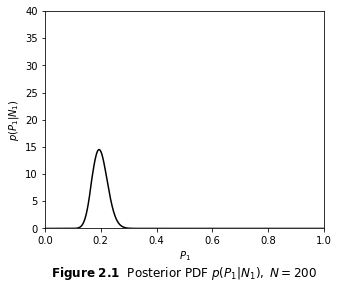

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Combination 함수
def comb(n,r):
    f = math.factorial
    return f(n) / (f(r) * f(n-r))
# 우도함수 (likelihood function)
def P(N,N1,P1):
    return comb(N,N1)*pow(P1,N1)*pow(1-P1,N-N1)
# 사전확률밀도함수 (prior PDF)
def p(P1):
    if P1 >= 0 and P1 < 1/6: return 12*P1
    elif P1 >= 1/6 and P1 <= 1: return (12/5)*(1-P1)
    else: return 0
# 1이 나올 확률 P1 정의 (0 ~ 1)
N_P1 = 1001;  # 데이터 개수
P1 = np.linspace(0,1,N_P1);
# 사전,사후 확률밀도함수, 우도함수 0으로 초기화
PDF_pri,PDF_pos,LHF = np.zeros(N_P1),np.zeros(N_P1),np.zeros(N_P1);
# 사전,사후 확률밀도함수, 우도함수 계산
N = 200; N1 = 39;
for i in range(N_P1):
    PDF_pri[i] = p(P1[i]);
    LHF[i] = P(N,N1,P1[i]);
    PDF_pos[i] = LHF[i]*PDF_pri[i];
PDF_pos /= (np.trapz(PDF_pos)*(P1[1]-P1[0])); # 넓이가 1이 되도록 정규화
# Plot
plt.figure(figsize=(5,4)); plt.plot(P1,PDF_pos,'k-'); plt.xlim(0,1); plt.ylim(0,40);
plt.xlabel('$P_1$');plt.ylabel('$p(P_1|N_1)$'); plt.title(r'$\bf{Figure\;2.1}$  Posterior PDF $p(P_1|N_1),\;N=200$',y=-0.25);

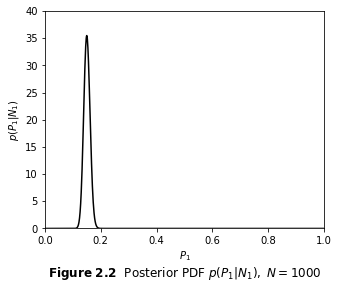

In [3]:
# 사전,사후 확률밀도함수, 우도함수 0으로 초기화
PDF_pri,PDF_pos,LHF = np.zeros(N_P1),np.zeros(N_P1),np.zeros(N_P1);
# 사전,사후 확률밀도함수, 우도함수 계산
N = 1000; N1 = 149;
for i in range(N_P1):
    PDF_pri[i] = p(P1[i]);
    LHF[i] = P(N,N1,P1[i]);
    PDF_pos[i] = LHF[i]*PDF_pri[i];
PDF_pos /= (np.trapz(PDF_pos)*(P1[1]-P1[0])); # 넓이가 1이 되도록 정규화
# Plot
plt.figure(figsize=(5,4)); plt.plot(P1,PDF_pos,'k-'); plt.xlim(0,1); plt.ylim(0,40);
plt.xlabel('$P_1$');plt.ylabel('$p(P_1|N_1)$'); plt.title(r'$\bf{Figure\;2.2}$  Posterior PDF $p(P_1|N_1),\;N=1000$',y=-0.25);

### 2.1.3 연속 변수를 갖는 이산 사건에 대한 베이즈 정리

특정 사건에 대하여, 연속변수를 측정하여 업데이트한 확률은 식(2.9)의 역수형태로 쉽게 얻을 수 있습니다.

$$P(A|\theta)=\frac{p(\theta|A)P(A)}{p(\theta)} \tag{2.10}$$

연속변수의 측정값이 주어진 경우 사건의 발생 확률은 위의 형태를 사용하여 업데이트할 수 있습니다.

**예제** 검사 결과의 해석

적성검사는 학생들의 특정 과목에 대한 능력을 평가하기 위해 수행됩니다. 상위 5%의 학생들은 우수한 능력을 가진다고 정의됩니다. 이전의 경험을 통해 우수한 학생들의 점수($\theta$)분포가 다음의 로그 정규분포를 따른다는 것을 알고 있습니다.

$$p(\theta|A)=\frac{1}{\sqrt{2\pi}\sigma\theta} exp \left[ -\frac{(ln\theta-\mu)^2}{2\sigma^2} \right] \tag{2.11} $$

평균은 550으로, 표준편차는 12으로 주어졌습니다. 위식 분포의 변수 $\mu$와 $\sigma^2$을 결정하기 위해서 평균과 분산에 대한 식을 다음과 같이 유도합니다.

$$M=E[\theta|A]=exp\left(\mu+\sigma^2/2 \right) \tag{2.12}$$

$$V=E[(\theta-E[\theta])^2|A] = \left[ exp(\sigma^2)-1 \right] exp(2\mu+\sigma^2) \tag{2.13}$$

따라서 변수 $\mu$와 $\sigma^2$은 다음과 같이 계산됩니다.

$$\mu=ln\left(\frac{M^2}{\sqrt{V+M^2}} \right)=6.3097 \tag{2.14}$$

$$\sigma^2=ln\left(\frac{V+M^2}{M^2} \right)=4.7592 \times 10^{-4} \tag{2.15}$$

In [46]:
M,V=550,144; 
mu = np.log(M**2/np.sqrt(V+M**2)); sig=np.sqrt(np.log((V+M**2)/M**2));
mu,sig**2

(6.309680318331487, 0.00047591979005989895)

반면, 나머지 학생들(그룹B)의 점수도 평균이 480이고 표준편차가 15인 로그-정규분포를 따릅니다. 따라서 그룹B의 경우 $\mu_B=6.1733$, $\sigma_B^2=9.7609 \times 10^{-4}$입니다. 전체확률의 법칙을 사용하면 모든 학생들의 분포는 다음과 같이 표현할 수 있습니다.

$$p(\theta)=p(\theta|A)P(A)+p(\theta|B)P(B)$$

$$=\frac{1}{20\sqrt{2\pi}\sigma\theta} exp\left[-\frac{(ln\theta-\mu)^2}{2\sigma^2}\right]+\frac{19}{20\sqrt{2\pi}\sigma_B\theta}exp\left[-\frac{(ln\theta-\mu_B)^2}{2\sigma_B^2} \right] \tag{2.16}$$

**그림2.3**은 상위 학생들(실선)과 일반 학생들(점선) 점수의 확률밀도 함수를 보여줍니다. **그림2.4**는 모든 학생들의 점수 분포를 보여줍니다.
식(2.10)의 베이즈법칙에 따라, 한 학생의 시험 점수를 알면 그 학생이 특정 과목을 잘할 확률을 업데이트 할 수 있습니다. 그리고 이는 **그림2.5**에 나타나 있습니다.

$$P(A|\theta)=\left\{1+\frac{19\sigma}{\sigma_B}exp\left[\frac{(ln\theta-\mu)^2}{2\sigma^2}-\frac{(ln\theta-\mu_B)^2}{2\sigma_B^2} \right] \right\}^{-1} \tag{2.17}$$

이 그림을 통해 한 학생이 특정 과목을 잘하는지에 대한 신뢰도 구간을 형성할 수 있습니다. 예를들어, 한 학생이 533점을 받았다면, 90%의 신뢰도로 이 학생은 이 과목을 잘합니다. 이 경계 값은 이 그룹의 평균보다 매우 작기 때문에 직관적으로 판단하는 값보다 매우 작을 수 있습니다. 하지만 일반 그룹의 학생이 533점 이상의 점수를 받을 확률은 0.038%밖에 안됩니다.

In [48]:
def log_norm(mu,sig,theta):
    return np.exp(-((np.log(theta)-mu)**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig*theta)

In [49]:
theta = np.linspace(350,500,151);
PA = log_norm(mu=mu,sig=sig,theta=theta);

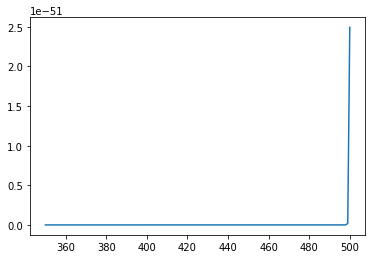

In [33]:
plt.plot(theta,PA)

(중략)

## 2.5 업데이트된 확률밀도함수의 수치적 표현

### 2.5.1 신뢰성 적분의 일반적인 형태

확률해석 분야에서 다음과 같은 적분을 자주 볼 수 있습니다.

$$ R\equiv \int_{\Theta} Q(\theta) p(\theta) d\theta \tag{2.125} $$

$Q$는 모드변수 벡터 $\theta$에 따라 달라지는 값이고, $p(\theta)$는 모드변수에 대한 사전 또는 사후 확률밀도함수입니다. $p(\theta)$가 사후확률밀도함수이면서 시스템에 대한 측정이 가능한 경우, 위의 적분은 다음과 같이 업데이트 될 수 있습니다.

$$R_D \equiv E[Q|D,C]\ = \int_\Theta Q(\theta)p(\theta|D,C) d\theta \tag{2.126} $$

신뢰성 해석을 하는경우, $Q$는 변수벡터 $\theta$를 갖는 구조물이 파손될 확률로 봅니다. 즉 $Q(\theta)=P(F|\theta,C)$입니다. 이 경우 업데이트된 적분식은 구조물이 가진을 받았을 때 업데이트된 파손 확률이 됩니다.

$$R_D=P(F|D,C)=\int_\Theta P(F|\theta,C)p(\theta|D,C) d\theta \tag{2.127} $$

이 업데이트된 파손확률은 $C$와 측정데이터로 업데이트한 정보로 부터 얻은 $\theta$에 대한 정보를 모두 포함합니다. 모델링에 대한 불확실도를 고려했기 때문에 이는 강건(robust)합니다. 업데이트된 구조물의 신뢰성은 $P(S|D,C)=1-P(F|D,C)$입니다. 여기서 $S$는 구조물의 안전한 상태를 의미합니다.

다른 예시는 손상에대한 확률입니다. 손상되지 않은 구조물의 강성을 기준으로 강성이 감소한 정도에 대한 비율로 손상을 정량화 할 수 있습니다. 손상되지 않은 구조물과 손상된 구조물을 측정 가능하다고 가정하고, 이를 $D^{ud}$와 $D^{pd}$로 표시합시다. $l$번째 하부구조물의 손상이 손상 수준 $d$를 넘을 확률은 다음과 같습니다.

$$P_l^{dam}(d|D^{ud},D^{pd},C) \equiv P\{\theta_l^{pd} < (1-d)\theta_l^{ud} |D^{ud},D^{pd},C\}$$

$$=\int_{-\infty}^{\infty} P(\theta_l^{pd} < (1-d)\theta_l^{ud} | \theta_l^{ud},D^{pd},C) p(\theta_l^{ud} |D^{ud},C) d\theta_l^{ud} \tag{2.128}$$

이 하부구조물에 손상이 있을 확률은 구조물의 손상 가능한 위치와 손상의 심각도를 알아내는데 사용될 수 있습니다. 식(2.128)의 적분식은 $D=\{D^{ud},D^{pd}\}, \theta=\theta_l^{ud}, Q(\theta)=P(\theta_l^{pd}<(1-d)\theta_l^{ud},D,C)$인 경우 식(2.126)의 업데이트된 적분으로 분류할 수 있습니다. 그러면 $l$번째 하부구조물의 손상이 심각도 $d$를 초과할 확률은 $R_D=p_l^{dam}(d|D^{ud},D^{pd},C)$가 됩니다.

### 2.5.2 몬테 카를로 시뮬레이션

몬테카를로 시뮬레이션(MCS)은 식(2.125)의 적분을 계산할 수 있는 잘 알려진 방법입니다. MCS는 문제의 종류나 랜덤변수의 수(즉, 적분의 차원)에 영향을 받지 않기 때문에 강건합니다. MCS의 핵심은 분포 $p(\theta):\theta_1,\theta_2,\dots,\theta_N$을 따르는 무작위 샘플 $\theta$를 모사하는 것입니다. 그러면 식(2.125)의 적분은 다음과 같이 통계적 평균을 통해 계산할 수 있습니다.

$$R \approx \frac{1}{N} \sum_{n=1}^{N} Q(\theta_n) \tag{2.129}$$